<a href="https://colab.research.google.com/github/tsenga2/boj-meeting-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2. Clone the repository
!git clone https://github.com/tsenga2/boj-meeting-analysis.git
%cd boj-meeting-analysis

Cloning into 'boj-meeting-analysis'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 123 (delta 71), reused 53 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 56.37 KiB | 3.32 MiB/s, done.
Resolving deltas: 100% (71/71), done.
/content/boj-meeting-analysis


In [3]:
# 3. Install required packages
!apt-get update
!apt-get install -y tesseract-ocr tesseract-ocr-jpn poppler-utils mecab libmecab-dev mecab-ipadic-utf8
!pip install pdf2image pytesseract mecab-python3 yfinance pandas-datareader scikit-learn numpy pandas matplotlib seaborn requests beautifulsoup4 lxml tqdm

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,375 kB]
Err:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages
  File has unexpected size (1374971 != 1374610). Mirror sync in progress? [IP: 23.47.218.82 443]
  Hashes of expected file:
   - Filesize:1374610 [weak]
   - SHA256:c669a35dd816a2a9916cbcf8362ba824b4439b1906e6b3f3d4919a164f4fedc3
   - SHA1:2476d4128f387056d994cb607f141ca447a6db90 [weak]
   - MD5Sum:a301292ed6c613e2020bf6182c52f581 [weak]
  Release file created at: Fri, 14 Mar 2025 03:02:57 +0000
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.st

In [15]:
# 4. Run the analysis (import from main.py and set Google Drive paths)
import os
import sys
sys.path.append('.')
from main import get_boj_meeting_dates, download_boj_pdfs, extract_boj_minutes_text, analyze_meeting_texts, fetch_market_data, calculate_inter_meeting_stats, combine_text_and_market_analysis, analyze_similarity_market_relationship

# Set paths to Google Drive
BASE_DIR = '/content/drive/MyDrive/BOJ_Analysis'
PDF_DIR = os.path.join(BASE_DIR, 'pdfs')
OUTPUT_DIR = os.path.join(BASE_DIR, 'output')

# Create directories
for directory in [BASE_DIR, PDF_DIR, OUTPUT_DIR]:
    os.makedirs(directory, exist_ok=True)



In [5]:
# Run analysis steps
print("Step 1: Get BOJ meeting dates")
meeting_dates = get_boj_meeting_dates()



Step 1: Get BOJ meeting dates
Fetching BOJ meeting dates from 1998 to 2025...
Fetching dates for 1998...
Found 20 meetings in 1998
Fetching dates for 1999...
Found 19 meetings in 1999
Fetching dates for 2000...
Found 18 meetings in 2000
Fetching dates for 2001...
Found 17 meetings in 2001
Fetching dates for 2002...
Found 16 meetings in 2002
Fetching dates for 2003...
Found 16 meetings in 2003
Fetching dates for 2004...
Found 16 meetings in 2004
Fetching dates for 2005...
Found 15 meetings in 2005
Fetching dates for 2006...
Found 14 meetings in 2006
Fetching dates for 2007...
Found 14 meetings in 2007
Fetching dates for 2008...
Found 18 meetings in 2008
Fetching dates for 2009...
Found 15 meetings in 2009
Fetching dates for 2010...
Found 16 meetings in 2010
Fetching dates for 2011...
Found 15 meetings in 2011
Fetching dates for 2012...
Found 14 meetings in 2012
Fetching dates for 2013...
Found 14 meetings in 2013
Fetching dates for 2014...
Found 14 meetings in 2014
Fetching dates for 20

In [6]:
print("Step 2: Download BOJ meeting PDFs")
download_boj_pdfs()  # Adjust year range as needed



Step 2: Download BOJ meeting PDFs
Checking year 1998...
No PDFs found for year 1998
Checking year 1999...
No PDFs found for year 1999
Checking year 2000...
No PDFs found for year 2000
Checking year 2001...
No PDFs found for year 2001
Checking year 2002...
No PDFs found for year 2002
Checking year 2003...
No PDFs found for year 2003
Checking year 2004...
No PDFs found for year 2004
Checking year 2005...
No PDFs found for year 2005
Checking year 2006...
Found 8 PDFs for year 2006


Year 2006: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]


Downloaded 8 new PDFs for 2006
Checking year 2007...
Found 14 PDFs for year 2007


Year 2007: 100%|██████████| 14/14 [00:04<00:00,  2.90it/s]


Downloaded 14 new PDFs for 2007
Checking year 2008...
Found 18 PDFs for year 2008


Year 2008: 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]


Downloaded 18 new PDFs for 2008
Checking year 2009...
Found 15 PDFs for year 2009


Year 2009: 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


Downloaded 15 new PDFs for 2009
Checking year 2010...
Found 16 PDFs for year 2010


Year 2010: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]


Downloaded 16 new PDFs for 2010
Checking year 2011...
Found 15 PDFs for year 2011


Year 2011: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]


Downloaded 15 new PDFs for 2011
Checking year 2012...
Found 14 PDFs for year 2012


Year 2012: 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]


Downloaded 14 new PDFs for 2012
Checking year 2013...
Found 14 PDFs for year 2013


Year 2013: 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]


Downloaded 14 new PDFs for 2013
Checking year 2014...
Found 14 PDFs for year 2014


Year 2014: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]

Downloaded 14 new PDFs for 2014
Download complete! Total new PDFs downloaded: 128


128

Step 3: Analyze meeting texts
Installing pdfminer.six...
Installing pymupdf...
Installing pikepdf...
Installing PyPDF2...
Found 128 PDF files

Processing file 1/128: 2006_g060615.pdf
Trying PyMuPDF extraction...
Successfully extracted 9500 characters with PyMuPDF
Saved extracted text to /content/drive/MyDrive/BOJ_Analysis/output/2006_g060615.txt

Processing file 2/128: 2006_g060714.pdf
Trying PyMuPDF extraction...
Successfully extracted 13615 characters with PyMuPDF
Saved extracted text to /content/drive/MyDrive/BOJ_Analysis/output/2006_g060714.txt

Processing file 3/128: 2006_g060811.pdf
Trying PyMuPDF extraction...
Successfully extracted 9150 characters with PyMuPDF
Saved extracted text to /content/drive/MyDrive/BOJ_Analysis/output/2006_g060811.txt

Processing file 4/128: 2006_g060908.pdf
Trying PyMuPDF extraction...
Successfully extracted 10053 characters with PyMuPDF
Saved extracted text to /content/drive/MyDrive/BOJ_Analysis/output/2006_g060908.txt

Processing file 5/128: 2006_g06

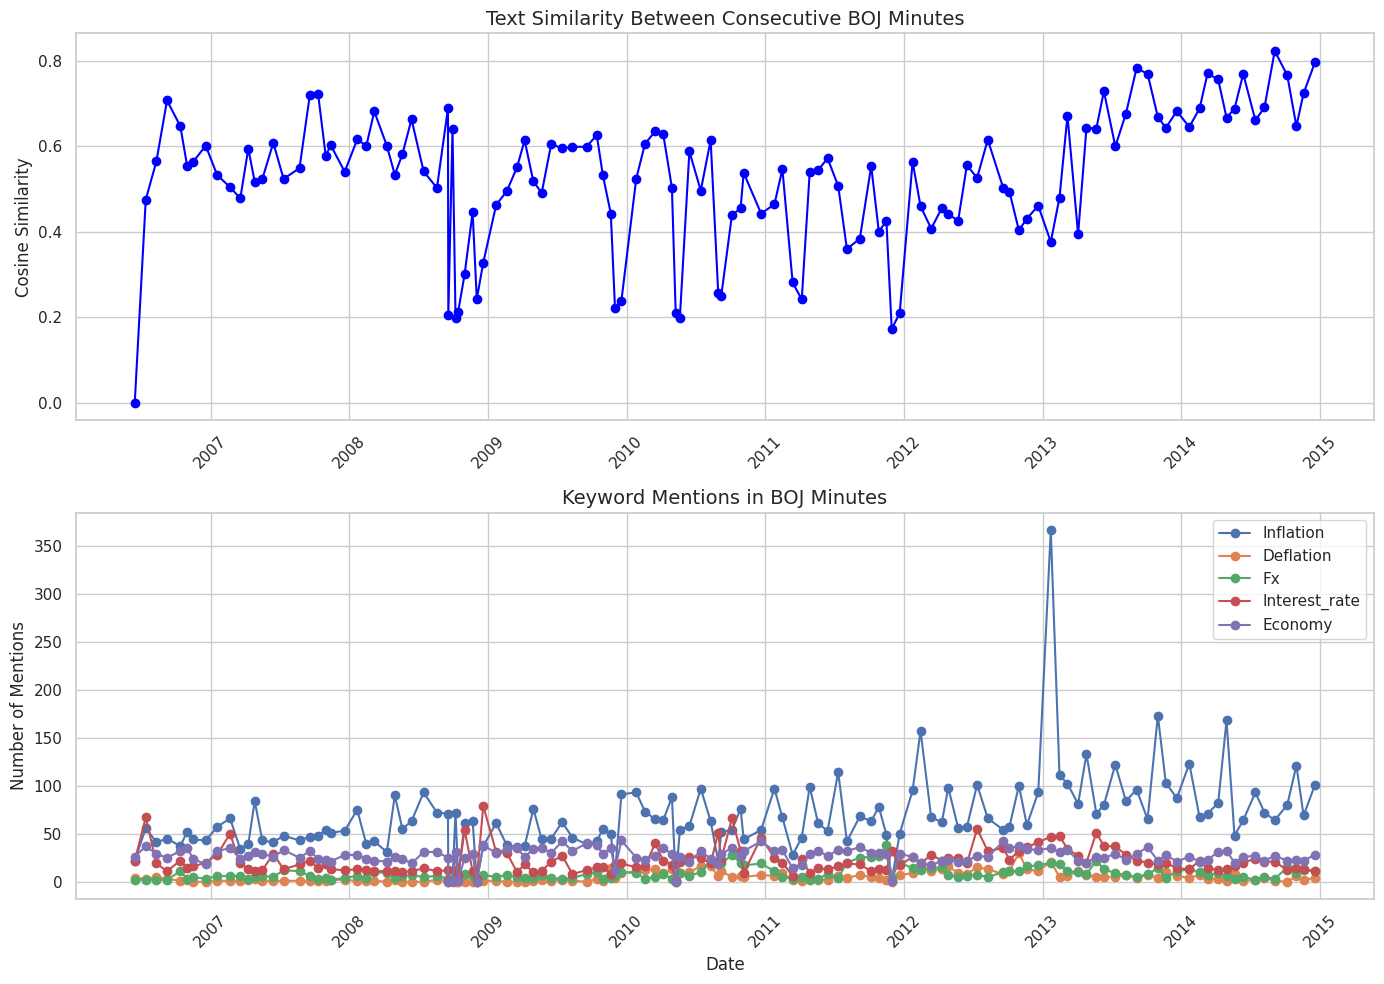

In [16]:
print("Step 3: Analyze meeting texts")
#text_df = analyze_meeting_texts(pdf_dir=PDF_DIR, max_pages=1)
text_df = extract_boj_minutes_text()

In [17]:
print("Step 4: Fetch market data")
market_data = fetch_market_data()



Step 4: Fetch market data
Fetching market data...
- Date range: 1998-01-01 to 2025-03-15
- Downloading Nikkei 225 data...
  Got 6665 data points for Nikkei 225
- Downloading USD/JPY and JGB data from FRED...
  Got 7184 data points from FRED
Final dataset: 7144 rows with complete data


/content/boj-meeting-analysis/main.py:1282: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_data = market_data.fillna(method='ffill')


In [18]:
print("Step 5: Calculate market statistics")
market_stats = calculate_inter_meeting_stats(market_data, meeting_dates)



Step 5: Calculate market statistics
Calculating statistics between 357 meeting pairs...


In [20]:
print("Step 6: Combine analyses")
combined_df = combine_text_and_market_analysis(text_df, market_stats)



Step 6: Combine analyses
Combined analysis has 127 meetings with both text and market data


Step 7: Analyze relationship


/content/boj-meeting-analysis/main.py:1496: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = combined_df.groupby('similarity_group')[available_metrics].mean()


Analysis complete!


<Figure size 1200x600 with 0 Axes>

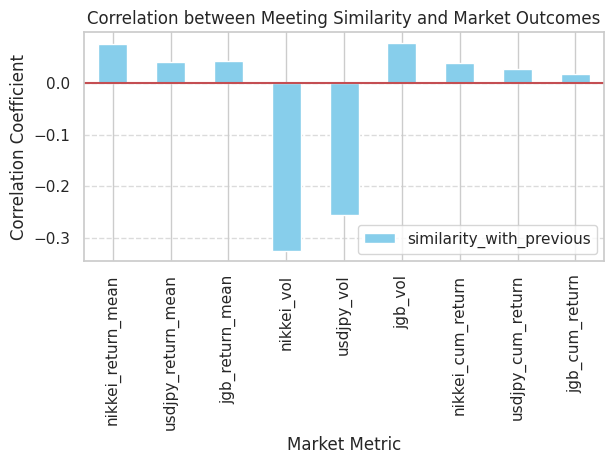

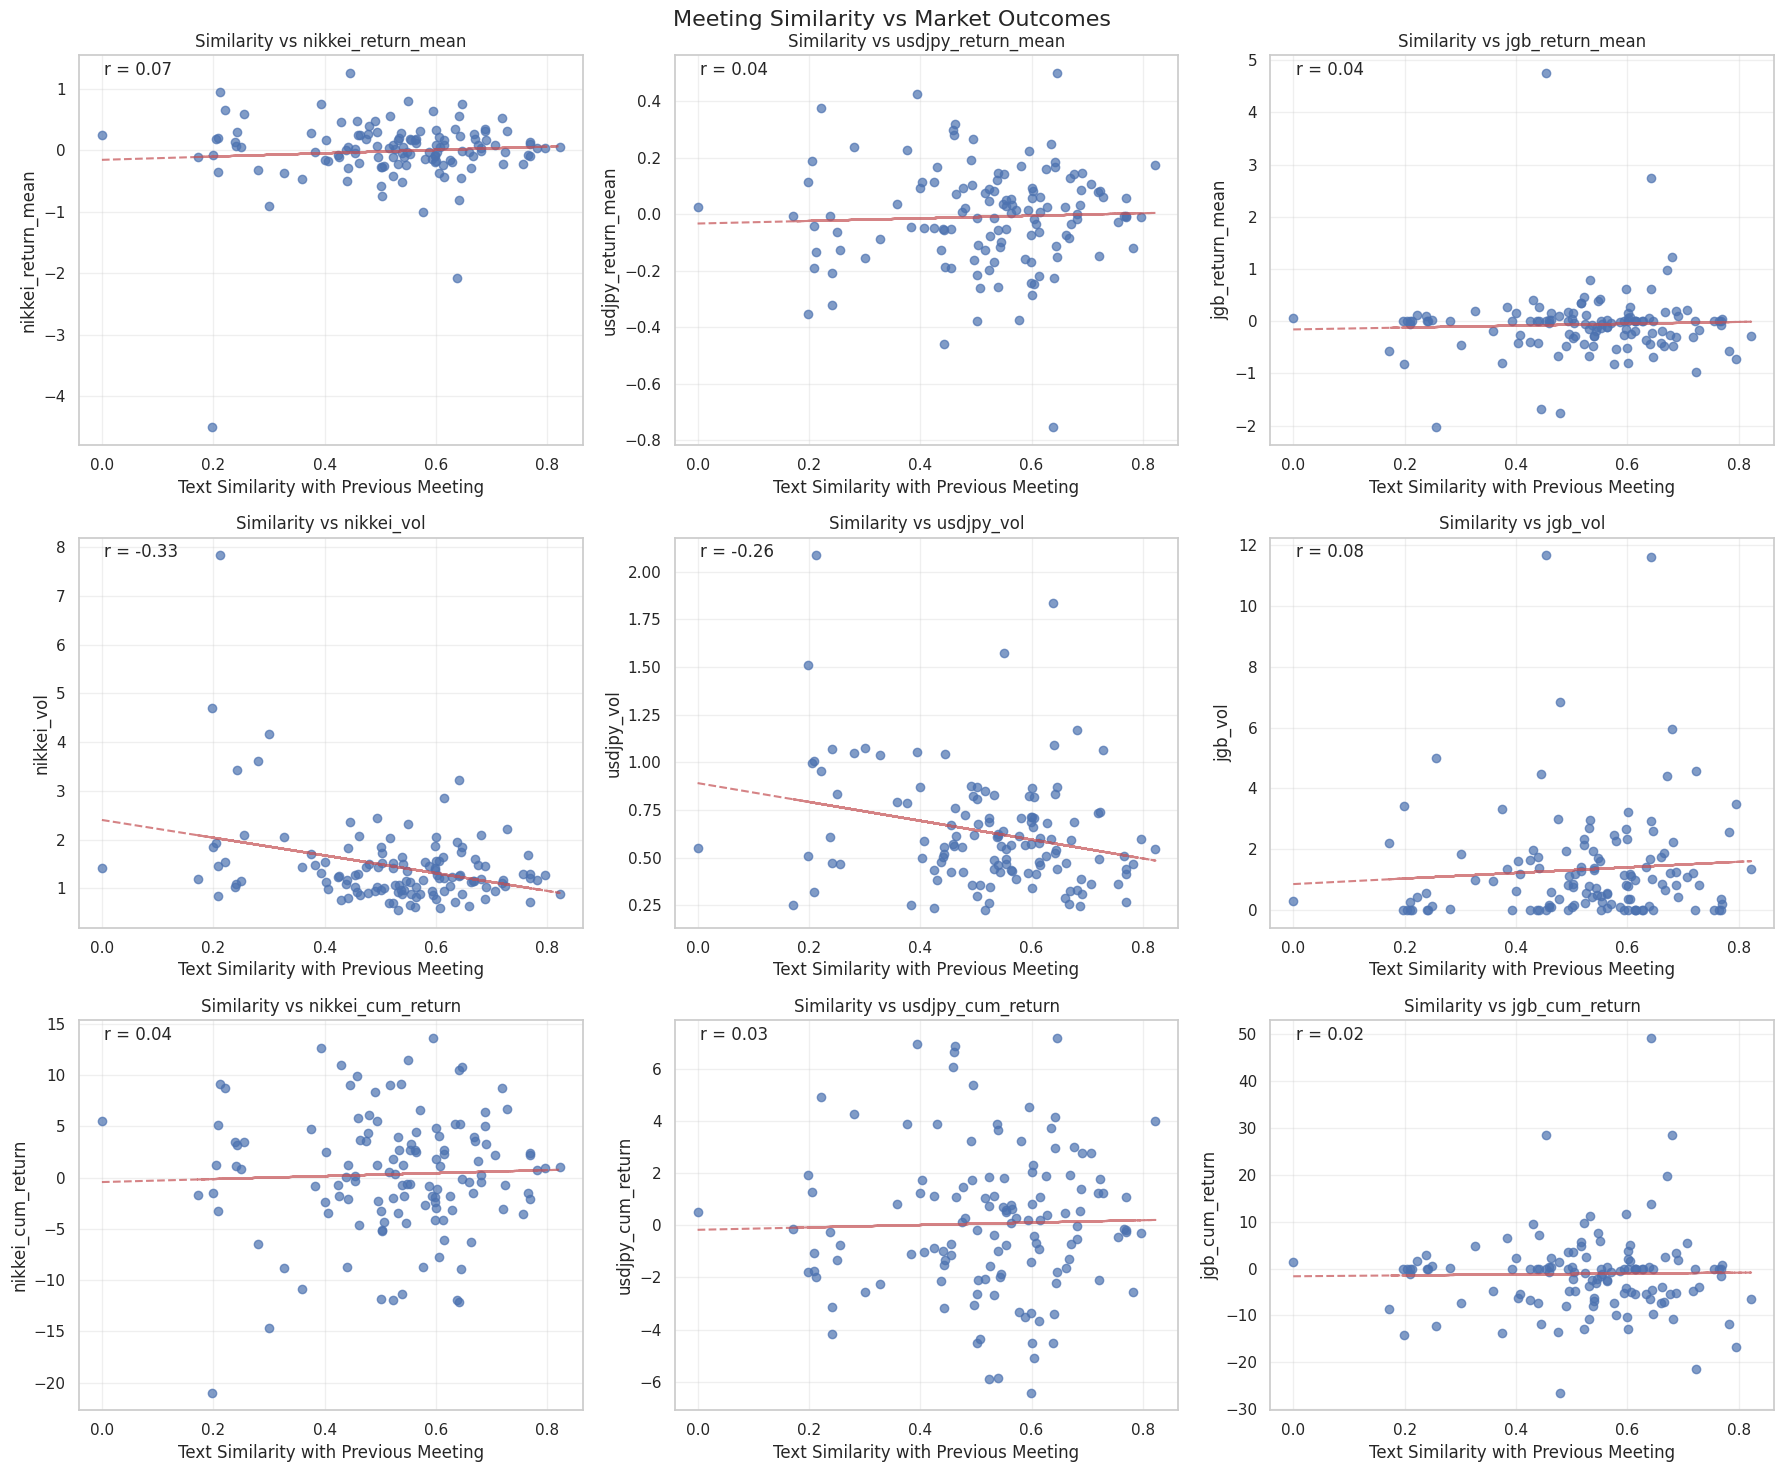

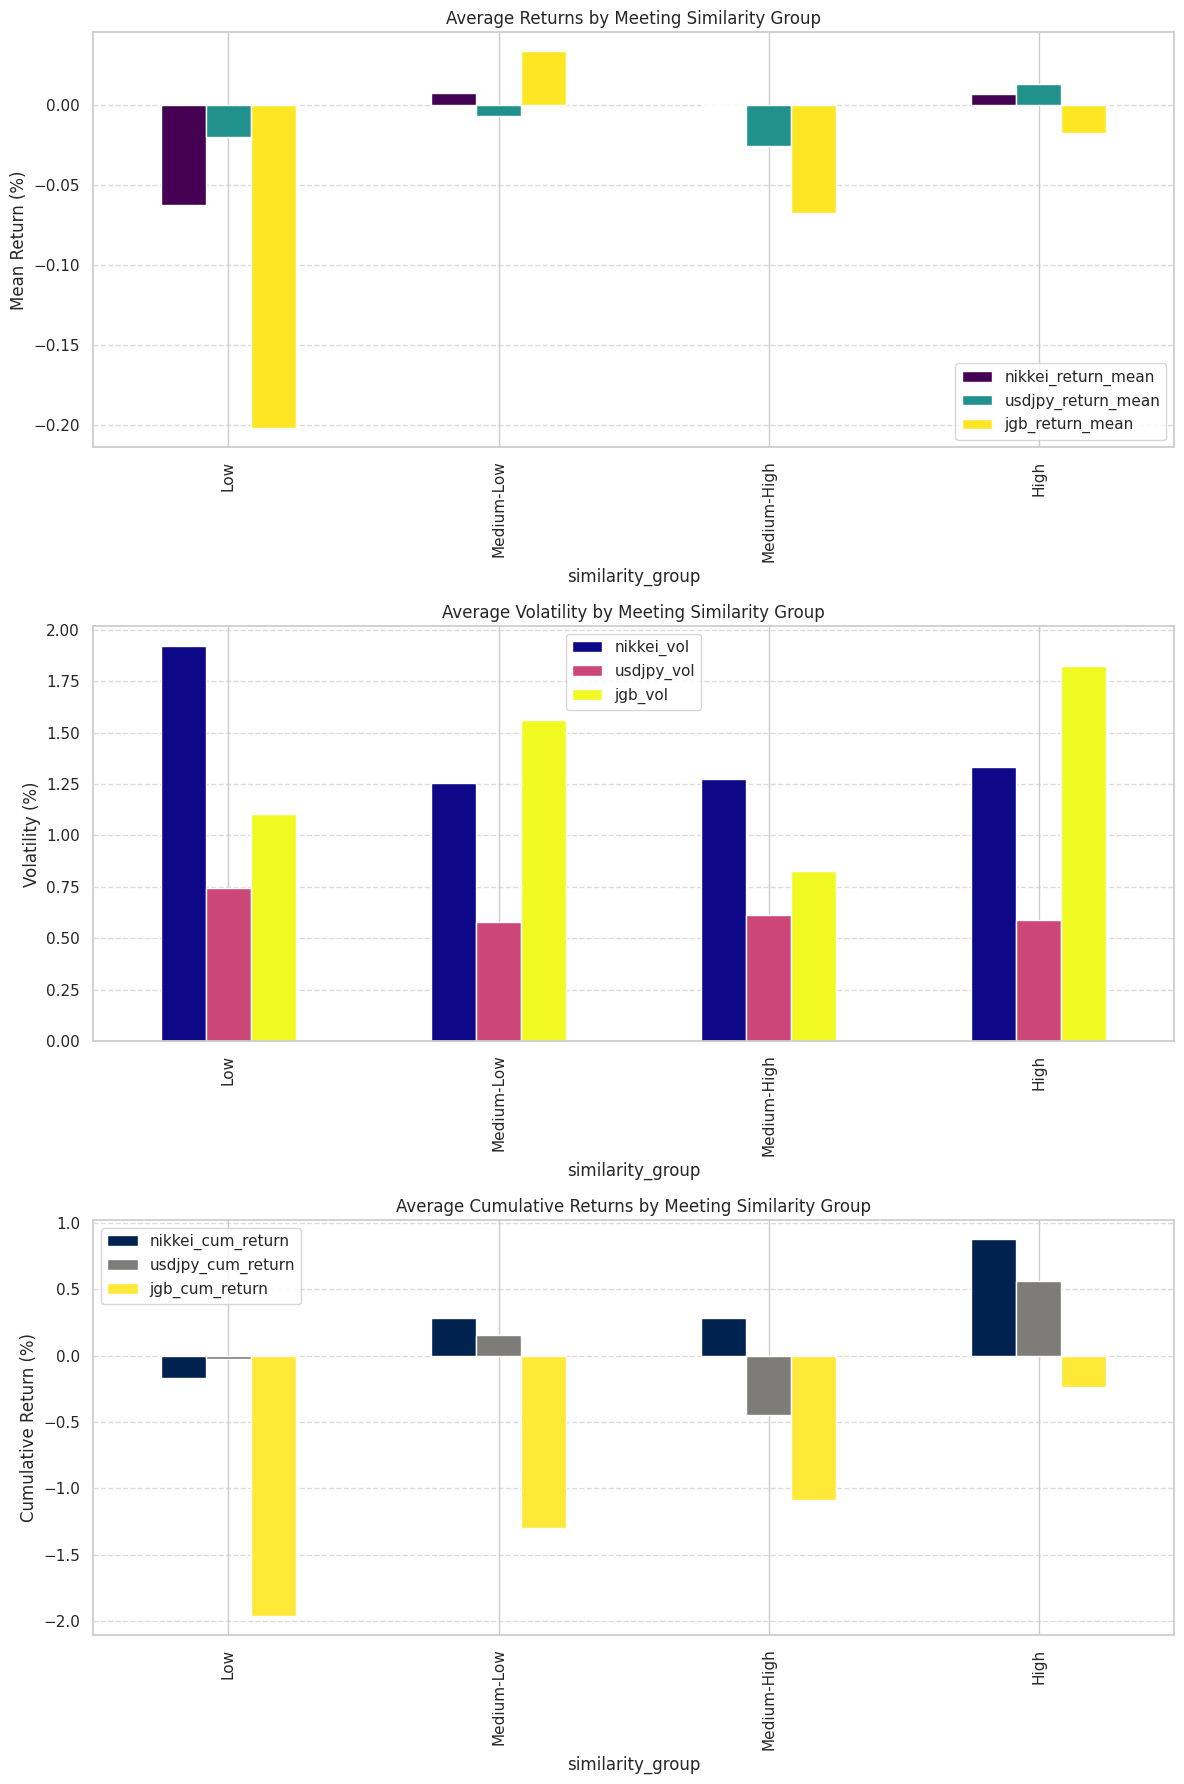

In [21]:
print("Step 7: Analyze relationship")
correlation_df, group_stats = analyze_similarity_market_relationship(combined_df)

print("Analysis complete!")